In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# data = pd.read_csv("https://raw.githubusercontent.com/ArmFriiz/Capstone_Bangkit/main/Dataset/Clean_data/Dataset_Encoder.csv")
# data

data = pd.read_csv("https://raw.githubusercontent.com/ArmFriiz/Capstone_Bangkit/main/Dataset/Clean_data/Dataset_Encoder_Dummy_2.csv")
data

# print(data.duplicated().sum())

,Gender,Age,Body Weight,Body Length,Breastfeeding,Stunting
0,1,17,10.0,72.2,0,0
1,0,11,2.9,65.0,0,1
2,1,16,8.5,72.2,0,1
3,1,31,6.4,63.0,0,1
4,1,15,10.5,49.0,0,1
...,...,...,...,...,...,...
18588,1,4,6.0,84.8,1,0
18589,0,20,16.6,107.5,0,0
18590,1,13,13.0,113.4,0,0
18591,0,56,11.5,37.2,0,1


In [ ]:
X = data.drop('Stunting', axis=1)
y = data['Stunting']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def build_and_train_model(batch_size):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        # BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        # BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation='relu'),
        # BatchNormalization(),
        # Dropout(0.5),
        Dense(32, activation='relu'),
        # BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])

    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

    history = model.fit(
        X_train_scaled, y_train,
        epochs=1000,
        batch_size=batch_size,
        validation_data=(X_test_scaled, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    return history, model

In [ ]:
batch_sizes = [32]
results = {}

for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    history, model = build_and_train_model(batch_size)
    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    results[batch_size] = accuracy
    print(f"Test accuracy with batch size {batch_size}: {accuracy:.4f}")

print(results)

Training with batch size: 32
Epoch 1/1000
465/465 [==============================] - 11s 6ms/step - loss: 0.2698 - accuracy: 0.8801 - val_loss: 0.2143 - val_accuracy: 0.9010 - lr: 0.0010
Epoch 2/1000
465/465 [==============================] - 2s 4ms/step - loss: 0.2312 - accuracy: 0.8990 - val_loss: 0.1980 - val_accuracy: 0.9056 - lr: 0.0010
Epoch 3/1000
465/465 [==============================] - 2s 4ms/step - loss: 0.2222 - accuracy: 0.9000 - val_loss: 0.1971 - val_accuracy: 0.9070 - lr: 0.0010
Epoch 4/1000
465/465 [==============================] - 2s 4ms/step - loss: 0.2164 - accuracy: 0.9047 - val_loss: 0.1948 - val_accuracy: 0.9097 - lr: 0.0010
Epoch 5/1000
465/465 [==============================] - 2s 5ms/step - loss: 0.2147 - accuracy: 0.9062 - val_loss: 0.1950 - val_accuracy: 0.9115 - lr: 0.0010
Epoch 6/1000
465/465 [==============================] - 2s 5ms/step - loss: 0.2108 - accuracy: 0.9076 - val_loss: 0.1968 - val_accuracy: 0.9088 - lr: 0.0010
Epoch 7/1000
465/465 [======

In [ ]:
# model.evaluate(X_test_scaled, y_test)

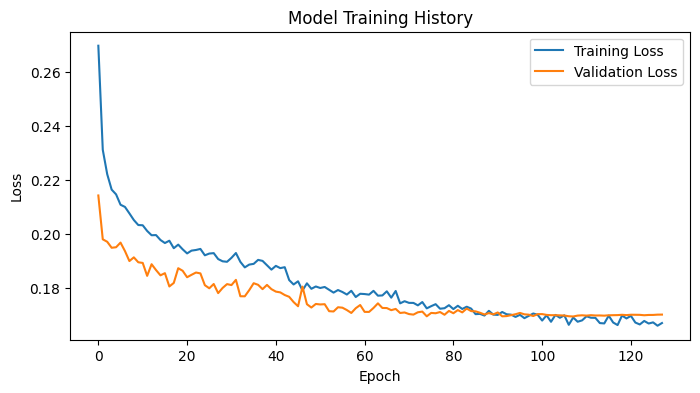

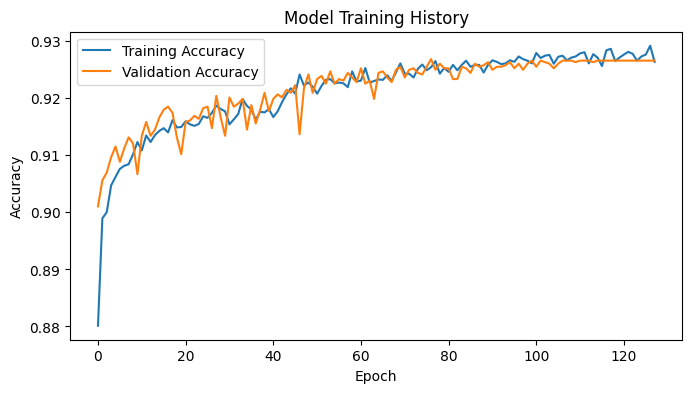

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(7.9, 4))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history)